# 데이터시각화 시험공부2
> DV 중간고사 정리2

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "데이터시각화"]

# 주로쓰는 패키지들

In [2]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
import cv2 as cv
from scipy import stats

# rpy2

In [14]:
import rpy2

R 에서 저장된 데이터를 불러오는 함수,패키지

______

# 데이터 가지고 놀기(산점도 응용)

### 데이터 불러오고 대략적인 해석(plotnine의 ggplot)

In [11]:
mpg = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/mpg.csv')

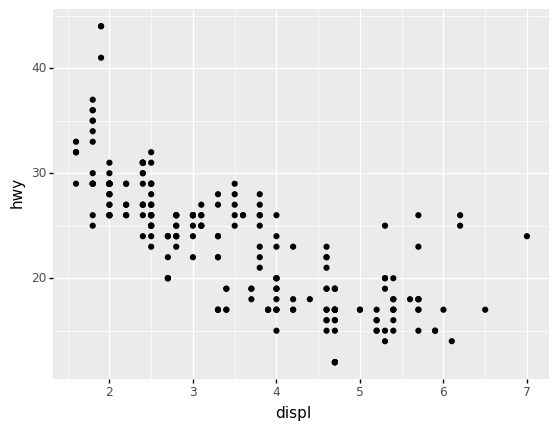

<ggplot: (8782640468625)>

In [15]:
ggplot(data = mpg) + geom_point(mapping = aes(x = "displ", y = "hwy")) ## plotnine(R의 ggplot 짭퉁)
# 빠르게 그리기: `mapping = ` 와 `data=`는 생략가능함 
# = ggplot(mpg) + geom_point(aes(x = "displ", y = "hwy")) ## plotnine 

- 산점도: 엔진크기displ와 연료효율hwy은 반비례. (엔진이 큰 차일수록 연비가 좋지 않다) 

ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy)) 
> 진짜 ggplot에서 그릴때에는 변수이름에 "" 를 제거함 

### 산점도응용 (3차원) 

`-` 데이터를 다시관찰 

In [50]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


`-` class도 함께 plot에 표시하면 데이터를 탐색할때 좀 더 좋을것 같다. 

#### 산점도 + 점크기변경 

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


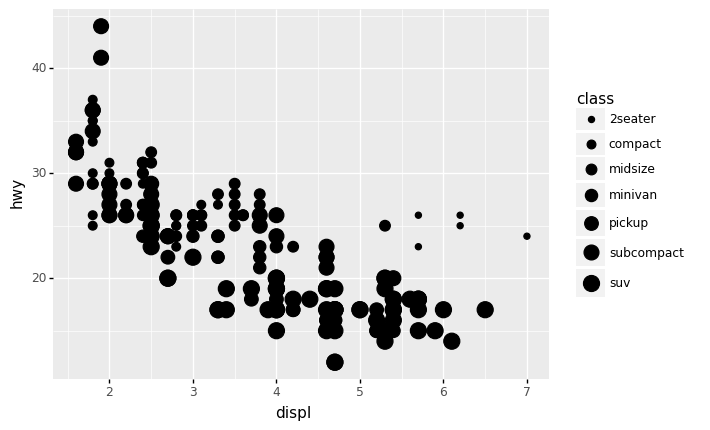

<ggplot: (8782640390747)>

In [17]:
ggplot(data=mpg)+ geom_point(mapping=aes(x='displ',y='hwy',size= 'class'))
# ,size = 'class' 추가로 산점도의 점크기 변경을 통해 3차원 해석 가능
#하지만 색이 같아서 알아보기 힘들다.

#### 산점도 + 투명도변경

/home/cgb3/anaconda3/envs/dv2021/lib/python3.8/site-packages/plotnine/scales/scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.


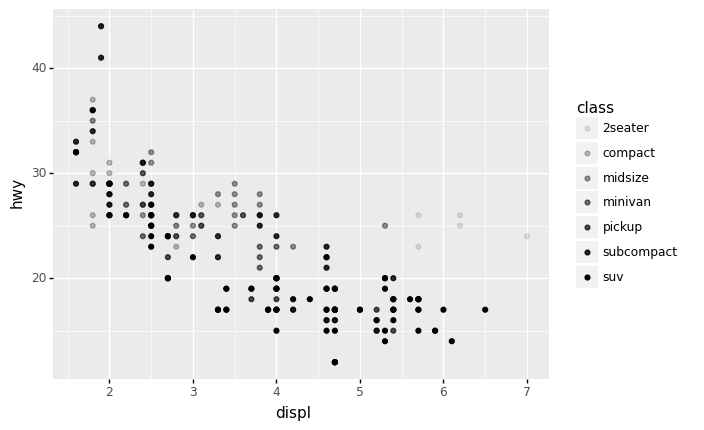

<ggplot: (8745132609895)>

In [55]:
ggplot(data=mpg)+ geom_point(mapping=aes(x='displ',y='hwy',alpha= 'class'))
# alpha='class' 의 추가로 산점도에 크기가 아닌 투명도로 3차원 그래프 생성

#### 산점도에 점크기 + 투명도 합하여 3차원 표기

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.


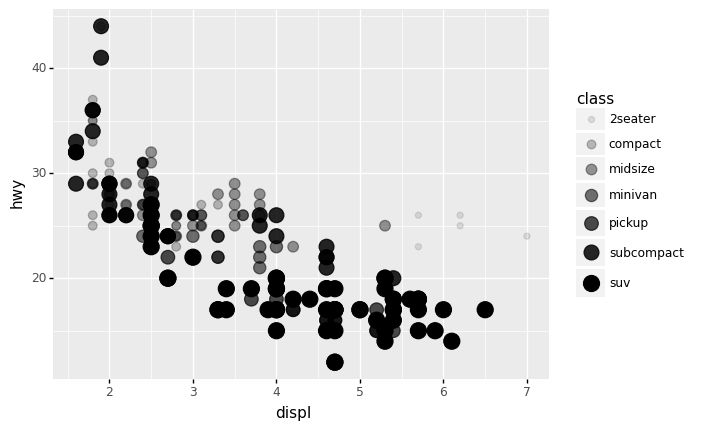

<ggplot: (8782640337583)>

In [18]:
ggplot(data=mpg)+ geom_point(mapping=aes(x='displ',y='hwy',size= 'class',alpha='class'))

#### 산점도 + 형태(점의 모양)

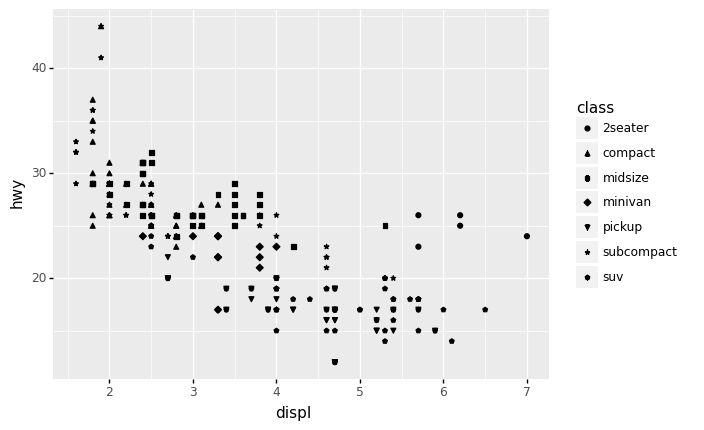

<ggplot: (8782640285946)>

In [19]:
ggplot(data=mpg)+ geom_point(mapping=aes(x='displ',y='hwy',shape='class'))
# shape = 'class' 추가로 모양을 통한 3차원 해석

#### 산점도 + 색깔 

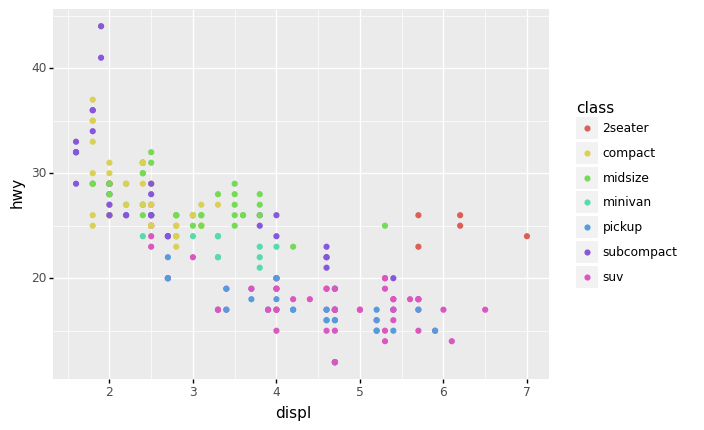

<ggplot: (8782640439414)>

In [20]:
ggplot(data=mpg)+ geom_point(mapping=aes(x='displ',y='hwy',color='class'))
#  color = 'class'  를 통해 색깔을 통한 3차원 해석

#### 어렵게 그리기

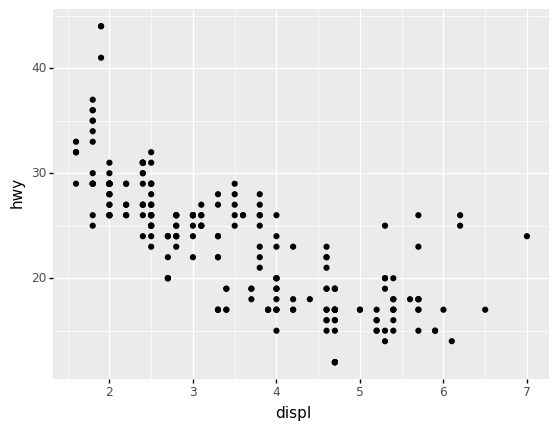

<ggplot: (8782638599304)>

In [23]:
fig=ggplot(data=mpg)  #도화지를 준비한다
a1=aes(x='displ',y='hwy')  #변수와 에스테틱사이의 맵핑을 설정한다.
point1=geom_point(mapping=a1)  #점들의 집합을 만든다. 즉 포인트지옴을 만든다.
fig+point1 #도화지와 지옴을 합친다.

#### 객체 지향적으로 그리기

In [24]:
a2=aes(x='displ',y='hwy',color='class')

In [25]:
a1,a2

({'x': 'displ', 'y': 'hwy'}, {'x': 'displ', 'y': 'hwy', 'color': 'class'})

In [26]:
point2=geom_point(a2)

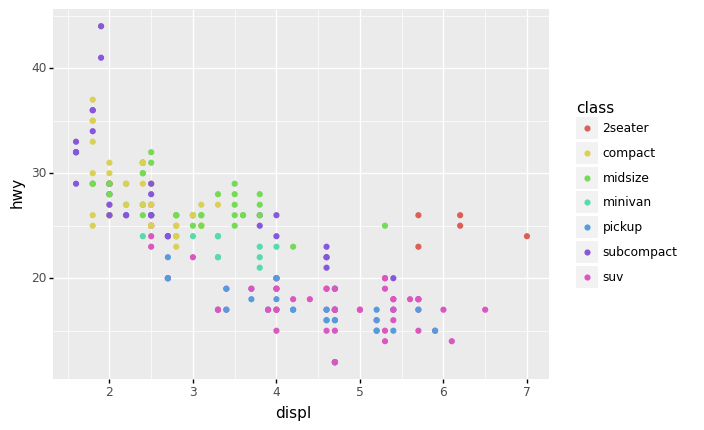

<ggplot: (8782638599244)>

In [27]:
fig+point2

#### 그래프에 적합선 추가

In [28]:
sline1=geom_smooth(a1)

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


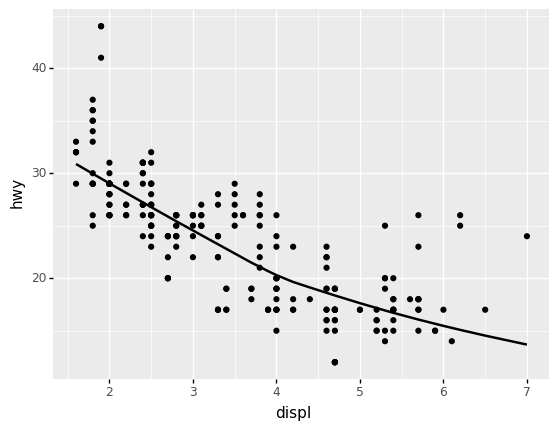

<ggplot: (8782638568807)>

In [29]:
fig+point1+sline1

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


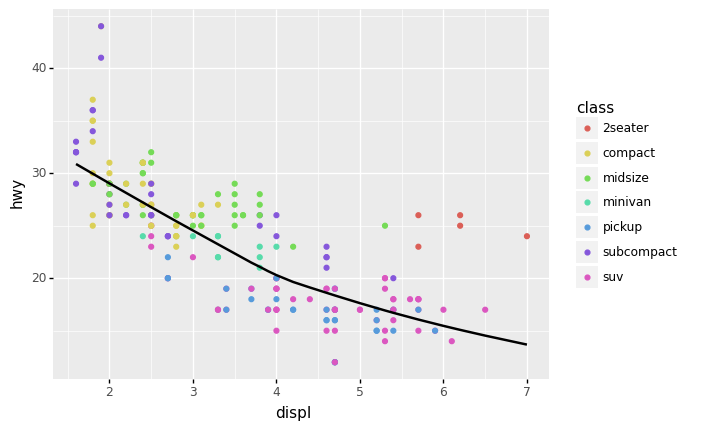

<ggplot: (8782638484258)>

In [30]:
fig+point2+sline1

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


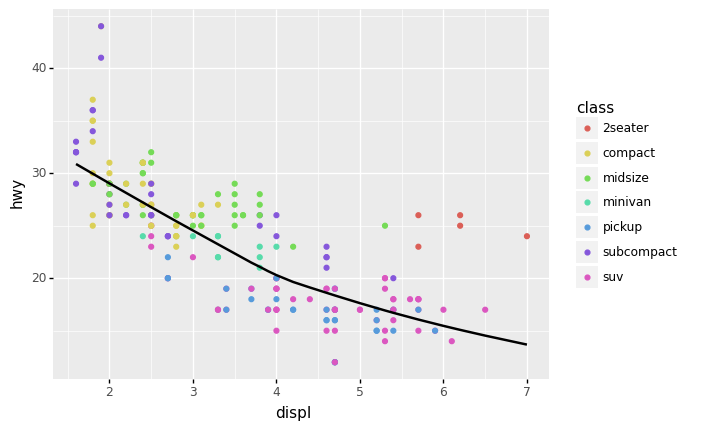

<ggplot: (8782638434226)>

In [31]:
ggplot(data=mpg)+geom_point(mapping=aes(x='displ',y='hwy',color='class'))+geom_smooth(mapping=aes(x='displ',y='hwy'))
# 명렁어를 통해 한번에 그리기

`-` 공통적인 맵핑규칙은 ggplot()쪽으로 빼기도 한다. (figure를 선언하는 곳에서 공통으로 선언함) 

/home/cgb3/anaconda3/envs/dv2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


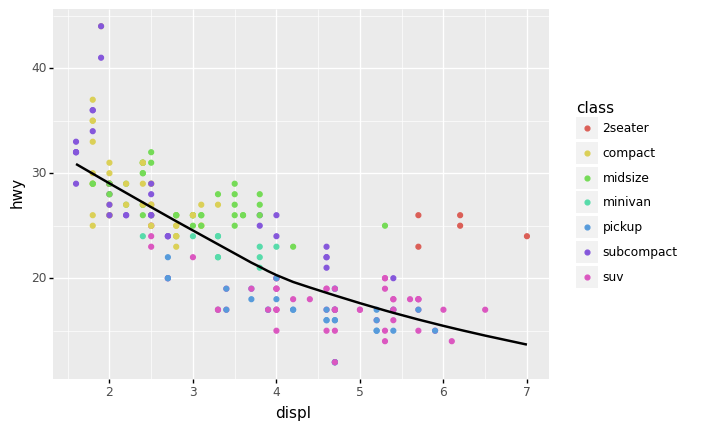

<ggplot: (8745132650084)>

In [80]:
ggplot(data=mpg,mapping=aes(x='displ',y='hwy'))+geom_point(mapping=aes(color='class'))+geom_smooth()

`-` R에서는 confidence interval도 geom_smooth()를 이용하여 확인할 수 있다. 

______

# 산점도응용2 (4차원) 
> drv (전륜, 후륜, 4륜 구동)에 따라서 데이터를 시각화 하고 싶다.  

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


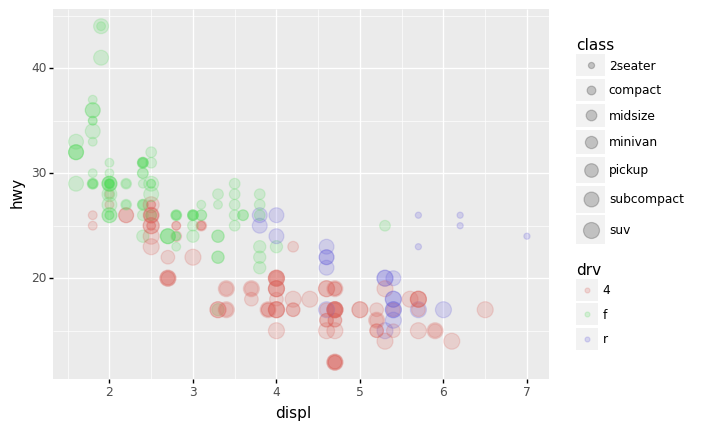

<ggplot: (8782638480496)>

In [32]:
ggplot(data=mpg,mapping=aes(x='displ',y='hwy'))+geom_point(mapping=aes(size='class',color='drv'),alpha=0.2)

- 모든 $x$에 대하여 붉은색 점들이 대부분 초록선과 보라색 점들에 비하여 아래쪽에 위치하여 있음 $\to$ 4륜구동방식이 연비가 좋지 않음 

`-` 객체지향적 

In [40]:
a3=a2.copy()  #a2를 복사하지만 저장된 id는 다름

In [41]:
id(a1),id(a2),id(a3)

(140522217560720, 140522217562000, 140522213860432)

In [42]:
a1,a2,a3

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'})

In [43]:
a3['color']='drv'
a3['size']='class'

In [44]:
a1,a2,a3

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'})

- 아래와 같이 선언해도 괜찮음 
```python 
a3=aes(x='displ',y='hwy',color='drv',size='class')
```

In [47]:
point3=geom_point(a3,alpha=0.2) #alpha 로 투명도 조절

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


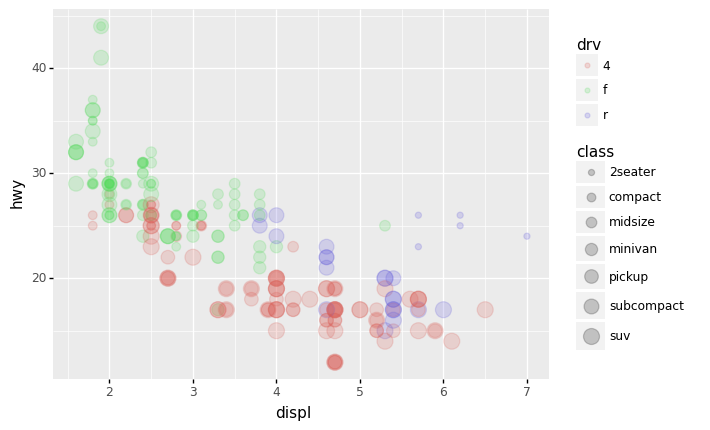

<ggplot: (8782638340422)>

In [48]:
fig+point3

`-` 여기에 선을 추가하여 보자. 

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


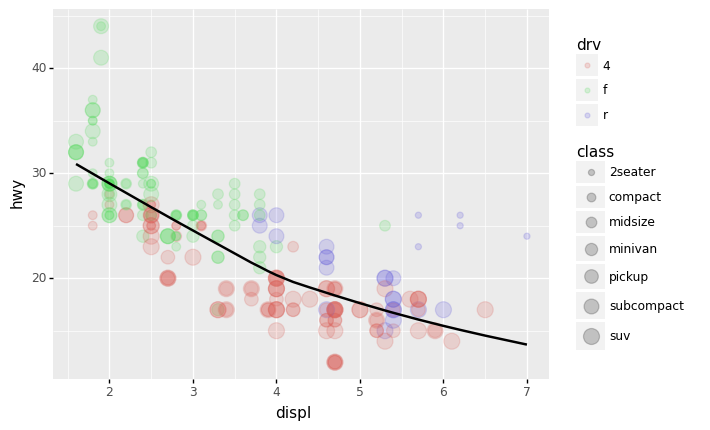

<ggplot: (8782638289195)>

In [49]:
fig+point3+sline1

#### 각 그룹별로 선을 따로 그리기

In [50]:
a4=a2.copy()

In [51]:
a4['color']='drv'

In [52]:
sline2=geom_smooth(a4)

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


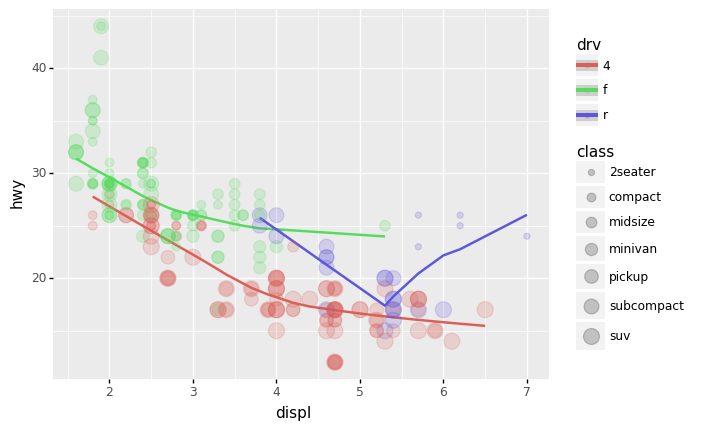

<ggplot: (8782638289165)>

In [53]:
fig+sline2+point3

#### 선의 색깔을 동일하게 하고 선의 타입을 변경하여 그룹을 표시

In [54]:
a5=a1.copy()

In [55]:
a5['linetype']='drv'

In [56]:
a5

{'x': 'displ', 'y': 'hwy', 'linetype': 'drv'}

In [57]:
sline3=geom_smooth(a5,size=0.5,color='gray')

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


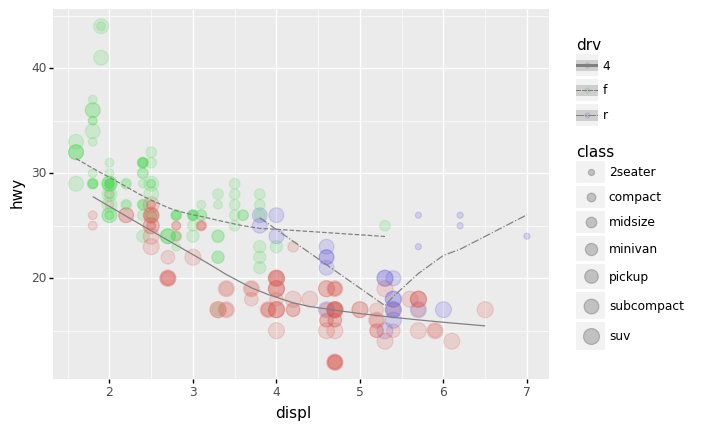

<ggplot: (8782638256240)>

In [58]:
fig+point3+sline3

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


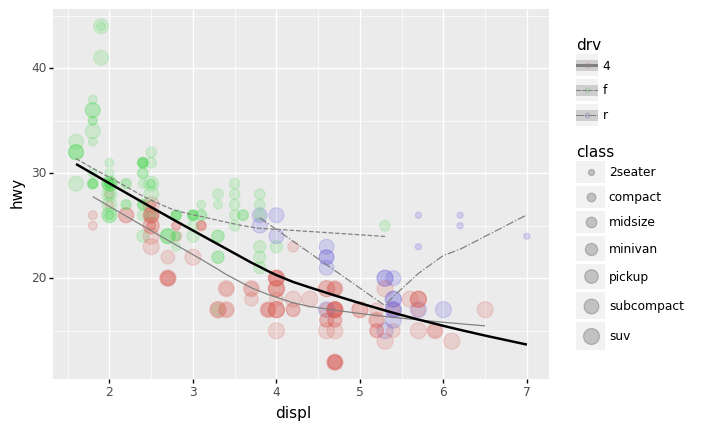

<ggplot: (8782638252496)>

In [59]:
fig+point3+sline3+sline1

/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/kdj/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


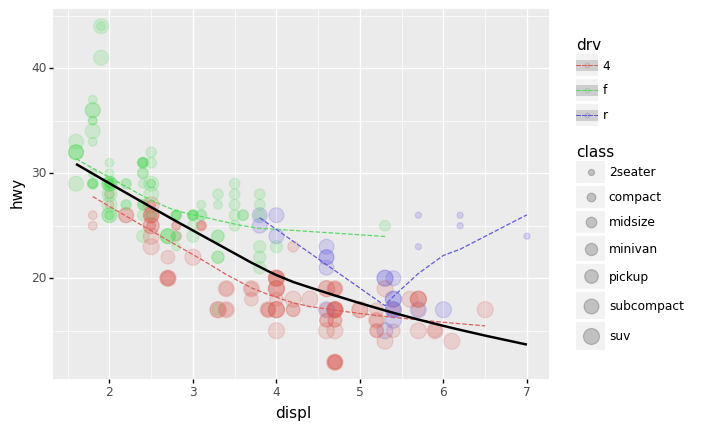

<ggplot: (8782716497014)>

In [60]:
sline2=geom_smooth(a4,size=0.5,linetype='dashed')
fig+point3+sline2+sline1    # 그래도 색으로 수분하는 것이 시각적으로 훌륭해보임

`-` 고차원의 변수를 표현할 수 있는 무기는 다양하다. 
- 산점도(포인트지옴): 점의크기, 점의형태, 점의색깔, 점의투명도
- 라인플랏(스무스지옴, 라인지옴): 선의형태, 선의색깔, 선의굵기 

### 결론 

`-` 잘 훈련한다면 여러가지 형태의 고차원 그래프를 우리도 그릴 수 있다. (마치 미나드처럼) 

`-` 해들리위컴은 이러한 방법을 체계적으로 정리했다고 보여진다. 

`-` 해들리위컴: 그래프는 데이터 + 지옴 + 맵핑(변수와 에스테틱간의 맵핑) + 스탯(통계) + 포지션 + 축 + 패싯그리드 7개의 조합으로 그릴수 있다. 
- 내생각: 지옴과 맵핑만 잘 이용해도 아주 다양한 그래프를 그릴 수 있음. 

_____

# 판다스에서 column을 선택하는 방법 

### 예제1 열 고르기

예제 df 생성

In [61]:
dic={'X1':np.random.normal(0,1,5),
     'X2':np.random.normal(0,1,5),
     'X3':np.random.normal(0,1,5)}
df=pd.DataFrame(dic)
df

,X1,X2,X3
0,0.316403,1.819641,-0.535532
1,-0.490887,1.222014,-0.886578
2,0.175277,1.124193,0.919066
3,-1.996759,-0.253654,0.214364
4,0.359407,-0.505990,-0.342295


In [64]:
df.X1 #방법 1

0    0.316403
1   -0.490887
2    0.175277
3   -1.996759
4    0.359407
Name: X1, dtype: float64

In [65]:
df['X1'] #방법 2 series를 리턴

0    0.316403
1   -0.490887
2    0.175277
3   -1.996759
4    0.359407
Name: X1, dtype: float64

In [66]:
df[['X1']] #방법 3 dataframe을 리턴

,X1
0,0.316403
1,-0.490887
2,0.175277
3,-1.996759
4,0.359407


In [67]:
df.loc[:,'X1'] #방법 4 loc 이용 , series 리턴

0    0.316403
1   -0.490887
2    0.175277
3   -1.996759
4    0.359407
Name: X1, dtype: float64

In [69]:
df.loc[:,['X1']] #방법 5 loc 이용 , dataframe 리턴

,X1
0,0.316403
1,-0.490887
2,0.175277
3,-1.996759
4,0.359407


In [68]:
df.loc[:,[True,False,False]]  #방법 6 , bull 인덱싱 (첫번째 열만 True로 불러오겠다.)

,X1
0,0.316403
1,-0.490887
2,0.175277
3,-1.996759
4,0.359407


In [70]:
df.iloc[:,0] # 방법 7 , 0번째 ( 파이썬이라 0이 1 ), series 리턴

0    0.316403
1   -0.490887
2    0.175277
3   -1.996759
4    0.359407
Name: X1, dtype: float64

In [71]:
df.iloc[:,[0]] # 방법 8 , 0번째 데이터 프레임 리턴

,X1
0,0.316403
1,-0.490887
2,0.175277
3,-1.996759
4,0.359407


In [72]:
df.iloc[:,[True,False,False]] #방법9 , bull형 iloc

,X1
0,0.316403
1,-0.490887
2,0.175277
3,-1.996759
4,0.359407


`-` `df.X1`로 열을 선택하는게 간단하고 편리함. 
- 단점1: 변수이름을 알고 있어야 한다는 단점이 있음. 
- 단점2: 변수이름에 .이 있거나 변수이름에서 공백이 있을경우 사용할 수 없음. 

단점의 예시

In [73]:
dic={'X.1':np.random.normal(0,1,5),
     'X.2':np.random.normal(0,1,5),
     'X.3':np.random.normal(0,1,5)}
_df=pd.DataFrame(dic)
_df

,X.1,X.2,X.3
0,0.135452,-1.312018,-0.431092
1,-0.531713,-0.235149,0.523488
2,0.360346,0.805032,-1.374940
3,-1.082895,-0.941979,0.687203
4,0.654108,0.098545,0.870038


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')

# 여러개의 열을 선택하기

In [80]:
dic2={'X1':np.random.normal(0,1,5),
     'X2':np.random.normal(0,1,5),
     'X3':np.random.normal(0,1,5),
     'X4':np.random.normal(0,1,5)}
df2=pd.DataFrame(dic2)
df2

,X1,X2,X3,X4
0,-0.289599,-1.360181,-1.383041,0.039000
1,2.079617,0.387465,0.409297,-0.125807
2,0.239503,-0.119209,-0.366100,-0.463638
3,2.425258,-0.832763,-0.770286,-0.015144
4,1.337020,0.066310,1.293585,-1.537895


In [81]:
df2[['X1','X2','X3']] #방법 1

,X1,X2,X3
0,-0.289599,-1.360181,-1.383041
1,2.079617,0.387465,0.409297
2,0.239503,-0.119209,-0.366100
3,2.425258,-0.832763,-0.770286
4,1.337020,0.066310,1.293585


In [82]:
df2.loc[:,['X1','X2','X3']] #방법 2

,X1,X2,X3
0,-0.289599,-1.360181,-1.383041
1,2.079617,0.387465,0.409297
2,0.239503,-0.119209,-0.366100
3,2.425258,-0.832763,-0.770286
4,1.337020,0.066310,1.293585


In [83]:
df2.loc[:,'X1':'X3'] #방법 3

,X1,X2,X3
0,-0.289599,-1.360181,-1.383041
1,2.079617,0.387465,0.409297
2,0.239503,-0.119209,-0.366100
3,2.425258,-0.832763,-0.770286
4,1.337020,0.066310,1.293585


In [85]:
df2.loc[:,[True,True,True,False]] #방법 4

,X1,X2,X3
0,-0.289599,-1.360181,-1.383041
1,2.079617,0.387465,0.409297
2,0.239503,-0.119209,-0.366100
3,2.425258,-0.832763,-0.770286
4,1.337020,0.066310,1.293585


In [86]:
df2.iloc[:,[0,1,2]] #방법 5

,X1,X2,X3
0,-0.289599,-1.360181,-1.383041
1,2.079617,0.387465,0.409297
2,0.239503,-0.119209,-0.366100
3,2.425258,-0.832763,-0.770286
4,1.337020,0.066310,1.293585


In [87]:
df2.iloc[:,:3] #방법 6
# = df2.iloc[:,0:3]
# = df2.iloc[:,range(3)]

,X1,X2,X3
0,-0.289599,-1.360181,-1.383041
1,2.079617,0.387465,0.409297
2,0.239503,-0.119209,-0.366100
3,2.425258,-0.832763,-0.770286
4,1.337020,0.066310,1.293585


In [88]:
df2.iloc[:,[True,True,True,False]]  #방법 7 , iloc + bull

,X1,X2,X3
0,-0.289599,-1.360181,-1.383041
1,2.079617,0.387465,0.409297
2,0.239503,-0.119209,-0.366100
3,2.425258,-0.832763,-0.770286
4,1.337020,0.066310,1.293585


그래서 column의 이름이 integer일 경우는 종종 매우 헷갈리는 일이 일어남
> Note: 사실 이것은 일부러 헷갈리게 예제를 구성한 것이다. 실제로는 헷갈리는 상황이 그렇게 자주 발생하지 않는다. 왜냐하면 보통 위와 같은 형태의 자료는 ndarray로 처리하고 colname이 있는 경우만 데이터프레임으로 처리하기 때문. 

_____

# 실전 예제
> movie data - 특정조건에 맞는 열을 선택 

In [89]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')

In [90]:
df.columns #열의 이름 출력

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [92]:
df.loc[:,['color':'num_voted_users','aspect_ratio']] #출력이 안됨

SyntaxError: invalid syntax (<ipython-input-92-5458cab12328>, line 1)

`-` (팁) 복잡한 조건은 iloc으로 쓰는게 편할때가 있다. $\to$ 그런데 `df.columns` 변수들이 몇번인지 알아보기 힘듬

In [94]:
pd.Series(df.columns) # $ 열의 이름을 인덱스와 함께 출력

0                         color
1                 director_name
2        num_critic_for_reviews
3                      duration
4       director_facebook_likes
5        actor_3_facebook_likes
6                  actor_2_name
7        actor_1_facebook_likes
8                         gross
9                        genres
10                 actor_1_name
11                  movie_title
12              num_voted_users
13    cast_total_facebook_likes
14                 actor_3_name
15         facenumber_in_poster
16                plot_keywords
17              movie_imdb_link
18         num_user_for_reviews
19                     language
20                      country
21               content_rating
22                       budget
23                   title_year
24       actor_2_facebook_likes
25                   imdb_score
26                 aspect_ratio
27         movie_facebook_likes
dtype: object

In [96]:
list(range(13))+[26] # 0~12까지 + 26

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 26]

In [97]:
df.iloc[:,list(range(13))+[26]] 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,aspect_ratio
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,1.78
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,2.35
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,2.35
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2.35
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,NaN
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,16.00
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2.35


In [74]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')

#### actor라는 단어가 포함된 변수들만 뽑고싶다. 

In [99]:
df.iloc[:,list(map(lambda x : 'actor' in x, df.columns) )]
# 방법1 iloc에서 map과 람다를 이용
# = df.iloc[:,map(lambda x : 'actor' in x, df.columns)]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


In [100]:
df.loc[:,list(map(lambda x : 'actor' in x, df.columns) )]
# 방법 2 loc에서 map과 람다를 이용
# = df.loc[:,map(lambda x : 'actor' in x, df.columns)]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


_____

#### 변수이름이 s로 끝나는 변수들만 뽑고싶다. 

In [ ]:
df.iloc[:,map(lambda x: 's' == x[-1],df.columns )]

In [ ]:
df.loc[:,map(lambda x: 's' == x[-1],df.columns )]

#### 변수이름이 c 혹은 d로 시작하는 변수들만 뽑고싶다. 

In [ ]:
df.iloc[:,map(lambda x: 'c' == x[0] or 'd' == x[0] ,df.columns )]

___

# df의 행을 선택하는 방법

#### 첫번째 행 선택해보기

In [101]:
np.random.seed(1)
dic= {'X1':np.random.normal(0,1,5), 
      'X2':np.random.normal(0,1,5), 
      'X3':np.random.normal(0,1,5), 
      'X4':np.random.normal(0,1,5), 
      'X5':np.random.normal(0,1,5), 
      'X6':np.random.normal(0,1,5)}
df1=pd.DataFrame(dic)
df1

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728
1,-0.611756,1.744812,-2.060141,-0.172428,1.144724,-0.122890
2,-0.528172,-0.761207,-0.322417,-0.877858,0.901591,-0.935769
3,-1.072969,0.319039,-0.384054,0.042214,0.502494,-0.267888
4,0.865408,-0.249370,1.133769,0.582815,0.900856,0.530355


In [105]:
df1.iloc[0] #방법 1 , 뭔가 이상하다.

X1    1.624345
X2   -2.301539
X3    1.462108
X4   -1.099891
X5   -1.100619
X6   -0.683728
Name: 0, dtype: float64

같은 출력
```Python
df1.iloc[0,:]
df1.loc[0]
df1.loc[0,:]
```

In [104]:
df1.iloc[[0]] #방법 2 , 데이터 프레임형태로 불러와서 괜찮아보인다.

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


같은 출력
```Python
df1.iloc[[0],:]
df1.loc[[0]]
df1.loc[[0],:]
df1.iloc[[True,False,False,False,False]]
df1.iloc[[True,False,False,False,False],:]
df1.loc[[True,False,False,False,False]]
df1.loc[[True,False,False,False,False],:]
```

#### 1,3행을 선택하는 방법 (불, 슬라이싱등 다양한 방법 존재)

In [106]:
df1.iloc[[0,2],:] #방법 1

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728
2,-0.528172,-0.761207,-0.322417,-0.877858,0.901591,-0.935769


In [107]:
df1.loc[[0,2],:] #방법 2

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728
2,-0.528172,-0.761207,-0.322417,-0.877858,0.901591,-0.935769


`-` 대부분의 경우 observation에 특정한 이름이 있는 경우는 없으므로 loc이 그다지 쓸모 없음 

`-` 그렇지만 특정경우에는 쓸모가 있음
> 날짜 출력 같은 경우, loc이 더 쓸모가 있다.

`-`
Note: 아래의 사실을 기억하자. 

- 기본적으로는 iloc, loc은 `[2], [2:]` 처럼 1차원으로 원소를 인덱싱할수도 있고, `[2,3], [:,2]` 와 같이 2차원으로 인덱싱할 수도 있다. 

- 1차원으로 인덱싱하는 경우는 기본적으로 행을 인덱싱한다 $\to$ iloc, loc은 행과 더 친하고 열과 친하지 않다.

- 따라서 열을 선택하는 방법에 있어서 loc, iloc이 그렇제 좋은 방법은 아니다. 

- 그렇지만 열을 선택하는 방법은 iloc이나 loc이 제일 편리하다. (이외의 다른 방법이 마땅하게 없음) 그래서 열을 선택할때도 iloc이나 loc을 선호한다. 

- row는 특정간격으로 뽑는 일이 빈번함. (예를들어 일별데이터를 주별데이터로 바꾸고싶을때, 바꾸고 싶을 경우?) 

- col을 특정간격으로 뽑아야 하는 일은 없음 

# lambda + map 으로 인덱싱

In [108]:
np.random.seed(1)
df2= pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'))
df2

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


#### 칼럼A의 값이 0보다 큰 경우의 행만 

In [112]:
df2.loc[map(lambda x: x>0,df2['A']),:] # 방법 1

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769


In [113]:
df2.loc[lambda df: df['A']>0,:] # 방법 2

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769


- map의 기능

(1) 리스트를 원소별로 분해하여

(2) 어떠한 함수를 적용하여 아웃풋을 구한뒤

(3) 각각의 아웃풋을 다시 하나의 리스트로 묶음 

- 우리는 이중에서 (1),(3)에만 집중했음 
- 하지만 생각해보면 일단 (2) 일단 함수를 적용하는 기능이 있었음 
- 그런데 위의 코드는 함수를 적용한 결과가 아니라 함수 오브젝트 자체를 전달하여도 동작함 

**요약!!**
- True, False로 이루어진 벡터를 리스트의 형태로 전달하여 인덱싱했음 (원래 우리가 알고 있는 개념) 
- True, False로 이루어진 벡터를 리턴할 수 있는 함수오브젝트 자체를 전달해도 인덱싱이 가능 

#### 칼럼A>0 이고 칼럼C<0 인 경우의 행 인덱싱

In [115]:
df2.loc[map(lambda x,y: x>0 and y<0, df2['A'],df2['C']),:]  # 방법 1

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
6,0.900856,-0.683728,-0.122890,-0.935769


In [117]:
df2.loc[map(lambda x,y: (x>0) & (y<0), df2['A'],df2['C']),:] # 방법 2
# 0<3.2 &  0<2.2 랑 (0<3.2) &  (0<2.2) 를 헷갈리면 안된다.

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
6,0.900856,-0.683728,-0.122890,-0.935769


In [118]:
df2.loc[lambda df: (df['A'] >0) & (df['C']<0)]  # 방법 3

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
6,0.900856,-0.683728,-0.122890,-0.935769
